# Introduction
For the project, I have gathered the datasets from the kaggle website. 
The first dataset contains India District-wise agriculture crop area and production statistics from the time period between  1997-2020.
The second datset contains about prediction of rainfall in India from the time period between 1901 - 2017.

https://www.kaggle.com/datasets/pyatakov/india-agriculture-crop-production

https://www.kaggle.com/datasets/rstogi896/rainfall-in-india

In order to clean and visualize the dataset I have used pandas, matplotlib and seaborn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the csv files

In [2]:
crops = pd.read_csv('India Agriculture Crop Production.csv')
crops.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [3]:
rainfall = pd.read_csv('Sub_Division_IMD_2017.csv')
rainfall.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


#### Information of the datasets

In [4]:
crops.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676425 entries, 0 to 676424
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             676425 non-null  object 
 1   District          676425 non-null  object 
 2   Crop              675458 non-null  object 
 3   Year              676425 non-null  object 
 4   Season            676425 non-null  object 
 5   Area              675458 non-null  float64
 6   Area Units        675458 non-null  object 
 7   Production        665684 non-null  float64
 8   Production Units  675458 non-null  object 
 9   Yield             675458 non-null  float64
dtypes: float64(3), object(7)
memory usage: 51.6+ MB


In [5]:
rainfall.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188 entries, 0 to 4187
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4188 non-null   object 
 1   YEAR         4188 non-null   int64  
 2   JAN          4184 non-null   float64
 3   FEB          4185 non-null   float64
 4   MAR          4182 non-null   float64
 5   APR          4184 non-null   float64
 6   MAY          4185 non-null   float64
 7   JUN          4183 non-null   float64
 8   JUL          4181 non-null   float64
 9   AUG          4184 non-null   float64
 10  SEP          4182 non-null   float64
 11  OCT          4181 non-null   float64
 12  NOV          4177 non-null   float64
 13  DEC          4178 non-null   float64
 14  ANNUAL       4162 non-null   float64
 15  JF           4182 non-null   float64
 16  MAM          4179 non-null   float64
 17  JJAS         4178 non-null   float64
 18  OND          4175 non-null   float64
dtypes: flo

#### Renamed few columns for merging convinience

In [6]:
rainfall.rename(columns = {'SUBDIVISION':'State'}, inplace = True)
rainfall.rename(columns = {'YEAR':'RainYear'}, inplace = True)
crops.rename(columns = {'Year':'CropYear'}, inplace = True)

#### As the crops dataset contains data between the time period 1997-2020 and the rainfall dataset contained the data between the time period 1901 - 2017. Merging the rainfall data from 1901 - 1997 would be unnecessary and leads to more duplicate values also. 

In [7]:
rains = rainfall.drop((rainfall[(rainfall['RainYear']>= 1901) & (rainfall['RainYear'] <= 1996)].index))
rains
# Rains dataframe between the time period 1997-2017

,State,RainYear,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
91,Andaman & Nicobar Islands,1997,9.5,0.0,0.2,15.6,281.1,199.5,918.5,430.6,440.2,128.7,292.8,38.4,2755.1,9.5,296.9,1988.8,459.9
92,Andaman & Nicobar Islands,1998,0.9,0.0,0.0,0.0,348.9,600.0,364.5,258.9,337.8,618.6,227.8,89.0,2846.4,0.9,348.9,1561.2,935.4
93,Andaman & Nicobar Islands,1999,46.8,44.6,14.2,270.6,257.4,295.0,408.5,329.2,325.3,437.5,124.9,145.7,2699.7,91.4,542.2,1358.0,708.1
94,Andaman & Nicobar Islands,2000,53.0,59.0,171.3,218.1,422.8,357.0,176.3,460.8,250.1,321.2,158.3,115.2,2763.2,112.0,812.2,1244.2,594.7
95,Andaman & Nicobar Islands,2001,89.0,15.7,143.3,30.1,705.3,370.7,341.3,469.0,334.4,267.6,222.6,91.8,3080.9,104.7,878.7,1515.4,582.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,Lakshadweep,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4184,Lakshadweep,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4185,Lakshadweep,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4
4186,Lakshadweep,2016,59.6,12.1,3.2,2.6,77.4,321.1,262.6,86.2,75.6,58.6,32.0,74.7,1065.7,71.7,83.2,745.4,165.4


#### There are few state names that are entered differently in two datasets. If we try to merge them as it is then the same states will be considered as two different states, which will lead to duplicate values, so replaced them with single name.

In [8]:
rains.replace({'Andaman & Nicobar Islands':'Andaman and Nicobar Islands', 'Jammu & Kashmir':'Jammu and Kashmir', 'Coastal Andhra Pradesh':'Andhra Pradesh', 'East Madhya Pradesh':'Madhya Pradesh', 'West Madhya Pradesh':'Madhya Pradesh', 'East Rajasthan':'Rajasthan', 'West Rajasthan':'Rajasthan', 'Coastal Karnataka':'Karnataka'}, inplace=True)

#### Merging the datasets

In [9]:
crops_rains = pd.merge(crops, rains, on='State')
crops_rains

,State,District,Crop,CropYear,Season,Area,Area Units,Production,Production Units,Yield,...,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541,...,430.6,440.2,128.7,292.8,38.4,2755.1,9.5,296.9,1988.8,459.9
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541,...,258.9,337.8,618.6,227.8,89.0,2846.4,0.9,348.9,1561.2,935.4
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541,...,329.2,325.3,437.5,124.9,145.7,2699.7,91.4,542.2,1358.0,708.1
3,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541,...,460.8,250.1,321.2,158.3,115.2,2763.2,112.0,812.2,1244.2,594.7
4,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541,...,469.0,334.4,267.6,222.6,91.8,3080.9,104.7,878.7,1515.4,582.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10099861,Telangana,VIKARABAD,Wheat,2019-20,Rabi,46.0,Hectare,85.0,Tonnes,1.847826,...,230.6,161.4,205.9,16.4,2.7,1348.7,31.4,33.0,1059.2,225.0
10099862,Telangana,VIKARABAD,Wheat,2019-20,Rabi,46.0,Hectare,85.0,Tonnes,1.847826,...,205.2,146.8,29.6,10.8,0.7,746.4,3.1,141.9,560.2,41.0
10099863,Telangana,VIKARABAD,Wheat,2019-20,Rabi,46.0,Hectare,85.0,Tonnes,1.847826,...,160.5,158.3,15.6,0.3,1.7,857.3,17.5,132.0,690.1,17.6
10099864,Telangana,VIKARABAD,Wheat,2019-20,Rabi,46.0,Hectare,85.0,Tonnes,1.847826,...,133.7,336.3,70.4,0.5,0.4,1043.4,1.4,70.9,899.8,71.3


#### checking for null values in the datasets

In [10]:
crops_rains.isnull().sum()

State                    0
District                 0
Crop                  8358
CropYear                 0
Season                   0
Area                  8358
Area Units            8358
Production          175644
Production Units      8358
Yield                 8358
RainYear                 0
JAN                  54986
FEB                  59812
MAR                      0
APR                      0
MAY                      0
JUN                      0
JUL                   8209
AUG                      0
SEP                      0
OCT                      0
NOV                   8209
DEC                   8209
ANNUAL              123007
JF                  114798
MAM                      0
JJAS                  8209
OND                   8209
dtype: int64

#### Interpolated the null values by using padding method.  

In [11]:
interpolated_data=crops_rains.interpolate(method='pad')

In [12]:
interpolated_data.isnull().sum()

State               0
District            0
Crop                0
CropYear            0
Season              0
Area                0
Area Units          0
Production          0
Production Units    0
Yield               0
RainYear            0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
ANNUAL              0
JF                  0
MAM                 0
JJAS                0
OND                 0
dtype: int64

#### Number of each different type of crops grown

In [13]:
Croptypes = interpolated_data.Crop.value_counts()
Croptypes

Rice                     521640
Maize                    518154
Moong(Green Gram)        378798
Urad                     364434
Sesamum                  341754
Onion                    329952
Wheat                    326088
Jowar                    324786
Groundnut                324282
Arhar/Tur                321510
Gram                     311052
Potato                   307272
Rapeseed &Mustard        303786
Dry chillies             297654
Sugarcane                292152
Bajra                    228648
Coriander                218862
Peas & beans (Pulses)    207018
Barley                   205464
Small millets            203742
Garlic                   201390
Linseed                  198450
Cotton(lint)             198324
Sweet potato             198324
Other Kharif pulses      196098
Sunflower                189798
Turmeric                 189084
Soyabean                 187236
Horse-gram               185262
Masoor                   184338
Ragi                     176358
Ginger  

## Does the rice yield more when there is high rainfall?

In [14]:
interpolated_data.loc[interpolated_data['ANNUAL'].idxmax()]
# max. annual rainfall is in the year 2013

State                Karnataka
District              BAGALKOT
Crop                  Arecanut
CropYear               2001-02
Season              Whole Year
Area                       4.0
Area Units             Hectare
Production                 6.0
Production Units        Tonnes
Yield                      1.5
RainYear                  2013
JAN                        2.4
FEB                       19.6
MAR                       19.0
APR                       28.5
MAY                      100.4
JUN                     1153.0
JUL                     1515.3
AUG                      680.2
SEP                      379.1
OCT                      265.1
NOV                       56.9
DEC                       10.0
ANNUAL                  4229.4
JF                        21.9
MAM                      147.9
JJAS                    3727.6
OND                      332.0
Name: 3101212, dtype: object

In [15]:
interpolated_data.loc[interpolated_data['ANNUAL'].idxmin()]
# min. annual rainfall is in the year 2002

State               Rajasthan
District                AJMER
Crop                Arhar/Tur
CropYear              2001-02
Season                 Kharif
Area                      4.0
Area Units            Hectare
Production                2.0
Production Units       Tonnes
Yield                     0.5
RainYear                 2002
JAN                       0.3
FEB                       2.6
MAR                       1.0
APR                       1.4
MAY                      11.2
JUN                      26.9
JUL                       2.4
AUG                      17.2
SEP                      20.6
OCT                       0.1
NOV                       2.5
DEC                       6.0
ANNUAL                   92.4
JF                        3.0
MAM                      13.7
JJAS                     67.2
OND                       8.6
Name: 7146515, dtype: object

Text(0.5, 1.0, 'Annual Yield of Rice when Rainfall is high in the year 2013')

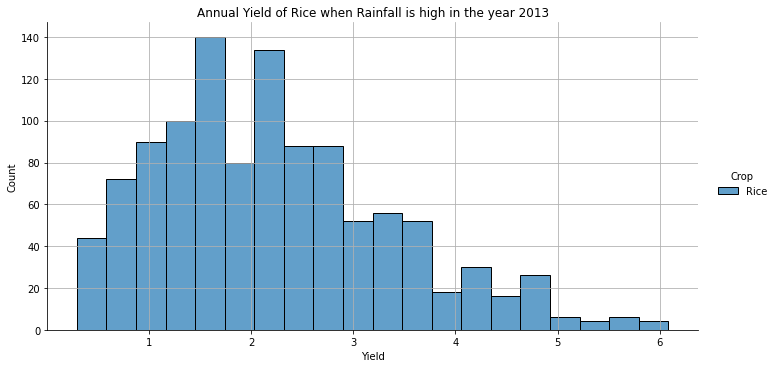

In [16]:
rice_maxrain = interpolated_data.loc[((interpolated_data['RainYear'] == 2013) & (interpolated_data['CropYear'] == '2013-14') & (interpolated_data['Crop'] == 'Rice'))]

plot = sns.displot(data = rice_maxrain, x = "Yield", hue = 'Crop', aspect = 2, alpha = 0.7)
plot.ax.grid()
plot.ax.set_title('Annual Yield of Rice when Rainfall is high in the year 2013')

Text(0.5, 1.0, 'Annual Yield of Rice when Rainfall is low in the year 2002')

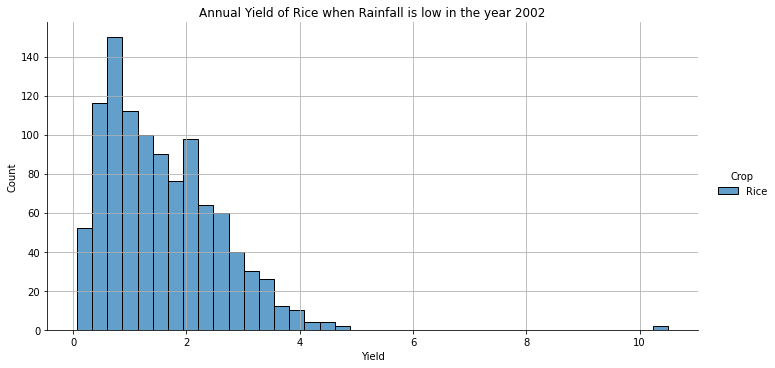

In [17]:
rice_minrain = interpolated_data.loc[((interpolated_data['RainYear'] == 2002) & (interpolated_data['CropYear'] == '2002-03') & (interpolated_data['Crop'] == 'Rice'))]

plot = sns.displot(data=rice_minrain, x = "Yield", hue = 'Crop', aspect = 2, alpha = 0.7)
plot.ax.grid()
plot.ax.set_title('Annual Yield of Rice when Rainfall is low in the year 2002')

### Which state grows more crops. State when there is highest rainfall or lowest rainfall?

Text(0.5, 1.0, 'Number of crops grown by state when rainfall is high')

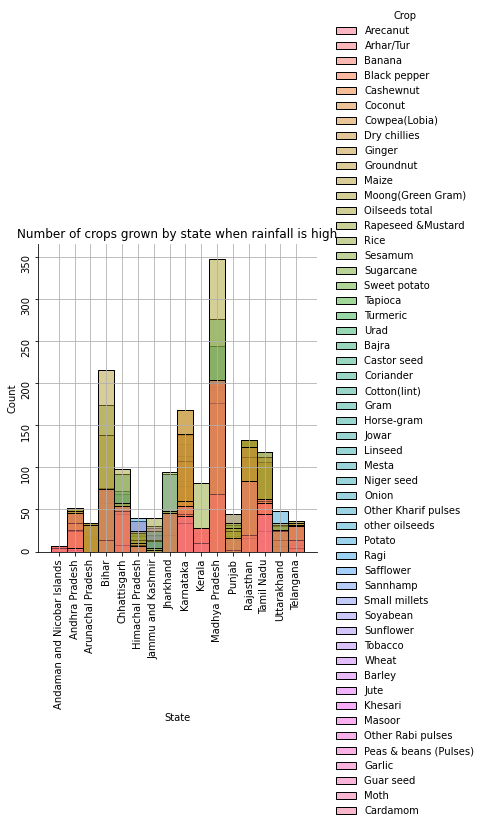

In [18]:
statecrops_maxrain = interpolated_data.loc[((interpolated_data['RainYear'] == 2013) & (interpolated_data['CropYear'] == '2013-14'))]
plot = sns.displot(data = statecrops_maxrain, x = "State", hue = 'Crop')
plot.ax.grid()
plot.ax.tick_params(labelrotation = 90)
plot.ax.set_title('Number of crops grown by state when rainfall is high')


Text(0.5, 1.0, 'Number of crops grown by state when rainfall is low')

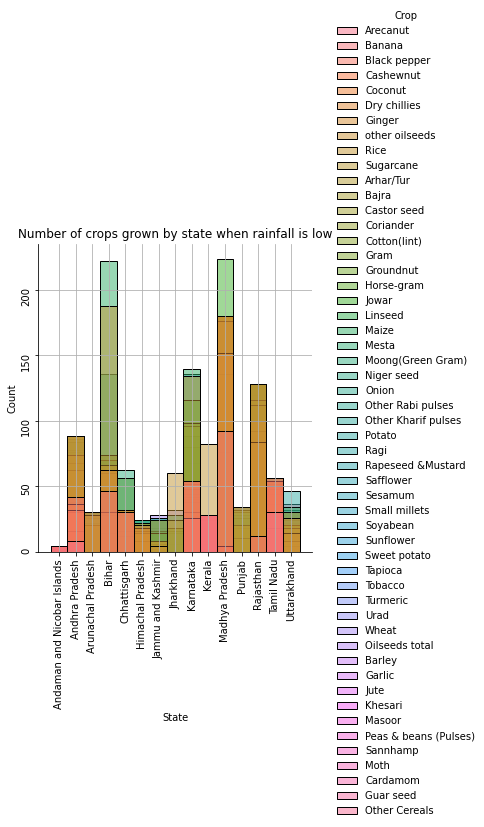

In [19]:
statecrops_minrain = interpolated_data.loc[((interpolated_data['RainYear'] == 2002) & (interpolated_data['CropYear'] == '2002-03'))]
plot = sns.displot(data = statecrops_minrain, x = "State", hue = 'Crop')
plot.ax.grid()
plot.ax.tick_params(labelrotation = 90)
plot.ax.set_title('Number of crops grown by state when rainfall is low')


# Conclusion

* The crops are grown depending on the season. Different crops are grown in different seasons.
* As the crops are grown according to the season, the annual yield of the crops are also mostly similar with high or low rainfall.
* Different states are producing different crops.
* There are more tha 50 different varieties of crops are produced depending on the demand of the crop. For instance as rice has more demand, the highest produced crop is Rice crop.